# Use the PyEphem library to interpret TLE data to visualize satellite orbits 

In [273]:
!pip install geopandas
!pip install pyephem

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

import ephem
import datetime

### Use ephem readtle function to read TLE data
Make sure you use a valid window of time, close to when the TLE data is recorded. 
(The date "stamp" is recorded in first line, 4th chunk of numbers)

In [274]:
# TLE for ISS ZARYA copied from PyEphem site 

sat_name = "ISS (ZARYA)"
line2 = "1 25544U 98067A   03097.78853147  .00021906  00000-0  28403-3 0  8652"
line3 = "2 25544  51.6361  13.7980 0004256  35.6671  59.2566 15.58778559250029"

sat_ephem = ephem.readtle(sat_name, line2, line3) 
start = datetime.datetime(2003, 3, 23, 12, 0, 0) 

### Create a list of times you're interested in, then get the longitude, latitude position for each time 

In [275]:
periods = 195 # How many minutes you want to track the satellite

list_of_times = []
longs = []
lats = []

# If interested in hours, for example, replace following two lines of code with
# for hour in range(periods): 
#   date = (start + datetime.timedelta(hours = hour)).isoformat() ...

for minute in range(periods):
  date = (start + datetime.timedelta(minutes = minute)).isoformat() 
  the_date = date.replace("T"," ")
  list_of_times.append(the_date)

  sat_ephem.compute(the_date) # Compute the satellite coordinates 
  longs.append( float( format( sat_ephem.sublong / np.pi*180) )) # Convert from radians to degrees 
  lats.append( float( format( sat_ephem.sublat / np.pi*180) ) )
  
# Create the structure of satellite coordindates to plot with geodataframe 
first_point = [Point(xy) for xy in zip(longs[0:1], lats[0:1])] 
geometry = [Point(xy) for xy in zip(longs, lats)]
geo_df = gpd.GeoDataFrame( geometry = geometry )
geo_df0 = gpd.GeoDataFrame( geometry = first_point ) # Plot first point in different color for reference 

## Plot the world map and calculated satellite trajectory

In [276]:
# Import the world map (of just coastal lines)
coast_map = gpd.read_file('ne_110m_coastline.shp') # Plot the world map (just coastlines, since filled in map takes hecka time to plot)
coast_map.head() # Quick peek at what the shapefile looks like 

,scalerank,featurecla,min_zoom,geometry
0,1,Coastline,1.0,"LINESTRING (-163.71290 -78.59567, -163.10580 -..."
1,0,Coastline,0.0,"LINESTRING (-6.19788 53.86757, -6.03299 53.153..."
2,0,Coastline,0.0,"LINESTRING (141.00021 -2.60015, 142.73525 -3.2..."
3,0,Coastline,0.0,"LINESTRING (114.20402 4.52587, 114.59996 4.900..."
4,1,Coastline,1.5,"LINESTRING (-93.61276 74.98000, -94.15691 74.5..."


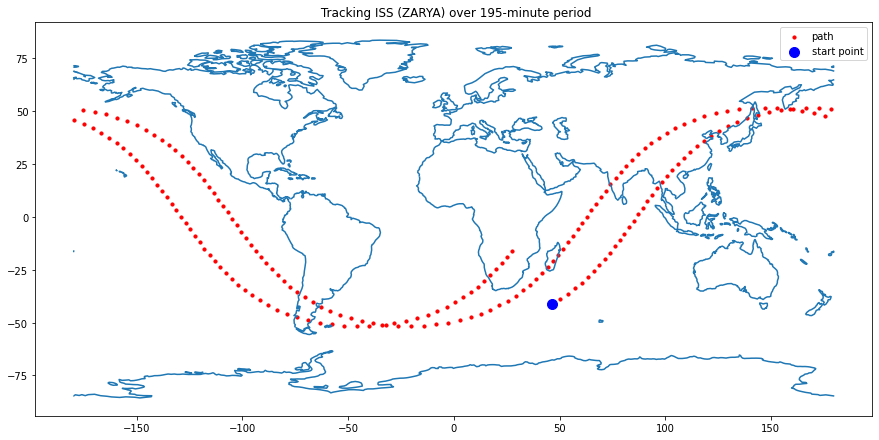

In [277]:
# Now plot the final figure

fig,ax = plt.subplots(figsize = (15,30)); 
coast_map.plot(ax=ax); # Plot the world map 
geo_df.plot( ax=ax, markersize=10, color='r', label='path'); # Plot the satellite path 
geo_df0.plot( ax=ax, markersize=100, color='b', label='start point'); # Plot first point in blue for reference 
plt.title(" Tracking "+sat_name+" over "+str(periods)+"-minute period" );
ax.legend();

# Another example, NOAA 14

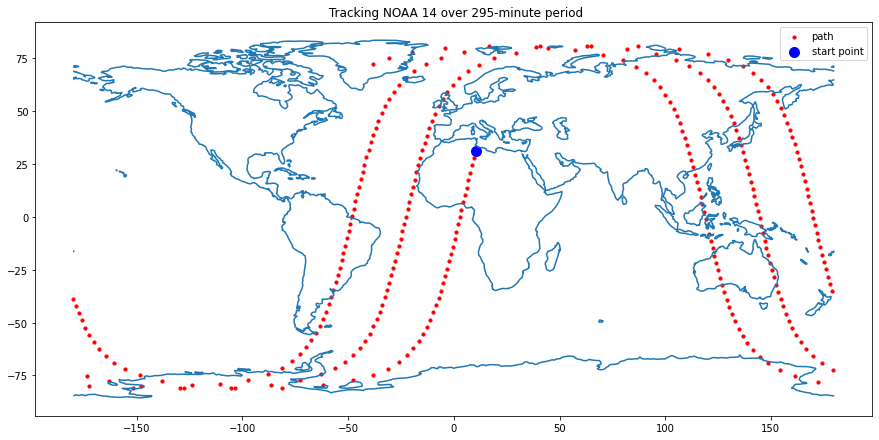

In [280]:
# Another example satellite, NOAA 14 mentioned in Chapter 2 of Statistical Orbit Determination 

sat_name = "NOAA 14";
#        123456789012345678901234567890123456789012345678901234567890123456789
line1 = "1 23455U 94089A   97229.90474114  .00000115  00000-0  88111-4  0 1530";
line2 = "2 23455 98.9964  181.3428 0010013 113.9737 246.2483 14.11685823135657";

sat_ephem = ephem.readtle(sat_name, line1, line2)
start = datetime.datetime(1997, 8, 17, 2, 0, 0)


periods = 295 # How many minutes you want to track the satellite

list_of_times = []
longs = []
lats = []
for minute in range(periods):
  date = (start + datetime.timedelta(minutes = minute)).isoformat()
  the_date = date.replace("T"," ")
  list_of_times.append(the_date)

  sat_ephem.compute(the_date) # Compute the satellite coordinates 
  longs.append( float( format( sat_ephem.sublong / np.pi*180) )) # Convert from radians to degrees 
  lats.append( float( format( sat_ephem.sublat / np.pi*180) ) )
  
# Create the structure of satellite coordindates to plot with geodataframe 
first_point = [Point(xy) for xy in zip(longs[0:1], lats[0:1])] 
geometry = [Point(xy) for xy in zip(longs, lats)]
geo_df = gpd.GeoDataFrame( geometry = geometry )
geo_df0 = gpd.GeoDataFrame( geometry = first_point ) # Plot first point in different color for reference 

# Now plot the final figure

fig,ax = plt.subplots(figsize = (15,30)); 
coast_map.plot(ax=ax); # Plot the world map 
geo_df.plot( ax=ax, markersize=10, color='r', label='path'); # Plot the satellite path 
geo_df0.plot( ax=ax, markersize=100, color='b', label='start point'); # Plot first point in blue for reference 
plt.title(" Tracking "+sat_name+" over "+str(periods)+"-minute period" );
ax.legend();